In [1]:
import pickle

data_to_load = {
    "X_train": None,
    "X_valid": None,
    "X_test": None,
    "y_train": None,
    "y_valid": None,
    "y_test": None,
    "ymean": None, 
    "ystd": None,
    "df_test": None
}
for k in data_to_load.keys():
    with open("D:/Desktop/high_freq/" + k + ".pkl", 'rb') as file:
        data_to_load[k] = pickle.load(file)
    file.close()
    
X_train, X_valid, X_test = data_to_load["X_train"], data_to_load["X_valid"], data_to_load["X_test"]
y_train, y_valid, y_test = data_to_load["y_train"], data_to_load["y_valid"], data_to_load["y_test"]
ymean, ystd = data_to_load["ymean"], data_to_load["ystd"]
df_test = data_to_load["df_test"]

In [2]:
import scutquant.scutquant as q
import pandas as pd

In [3]:
model = q.auto_lgbm(X_train, y_train, X_valid, y_valid)

Training until validation scores don't improve for 30 rounds
[20]	train's l2: 0.908983	valid's l2: 0.910512
[40]	train's l2: 0.908103	valid's l2: 0.909687
[60]	train's l2: 0.907483	valid's l2: 0.90924
[80]	train's l2: 0.907034	valid's l2: 0.908988
[100]	train's l2: 0.906665	valid's l2: 0.908844
[120]	train's l2: 0.906367	valid's l2: 0.908779
[140]	train's l2: 0.906059	valid's l2: 0.908731
[160]	train's l2: 0.905737	valid's l2: 0.908675
[180]	train's l2: 0.90542	valid's l2: 0.90861
[200]	train's l2: 0.905154	valid's l2: 0.908579
[220]	train's l2: 0.904875	valid's l2: 0.908545
[240]	train's l2: 0.904568	valid's l2: 0.908494
[260]	train's l2: 0.904273	valid's l2: 0.908454
[280]	train's l2: 0.903998	valid's l2: 0.908425
[300]	train's l2: 0.903713	valid's l2: 0.908393
[320]	train's l2: 0.903426	valid's l2: 0.908353
[340]	train's l2: 0.90313	valid's l2: 0.908331
[360]	train's l2: 0.902852	valid's l2: 0.908322
[380]	train's l2: 0.90258	valid's l2: 0.90832
[400]	train's l2: 0.902306	valid's l2

In [4]:
pred = pd.DataFrame(model.predict(X_test), columns=["predict"], index=X_test.index)
pred["predict"] += ymean
pred["predict"] *= ystd

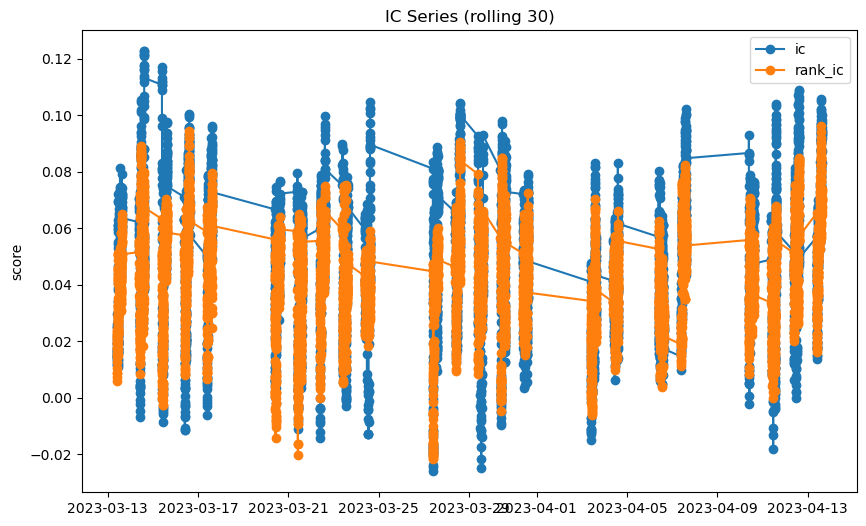

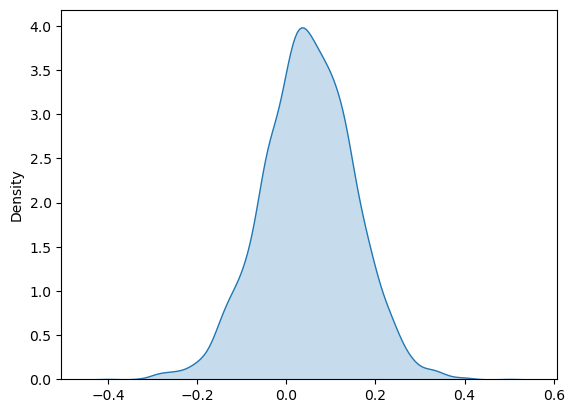

0.0477111737795141 0.4654021563788527 0.04240984572844473 0.5673917055000598


0.046929914024541004

In [5]:
ic, icir, rank_ic, rank_icir = q.ic_ana(pred, y_test)
print(ic, icir, rank_ic, rank_icir)
r = q.pearson_corr(pred["predict"], y_test)
r

In [6]:
from scutquant import report, executor

Accuracy of Prediction: 0.6562472951408234


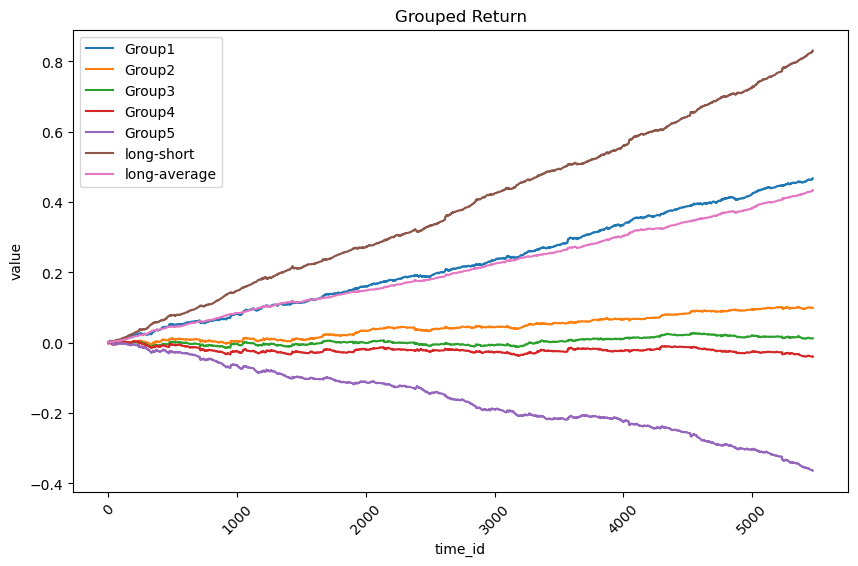

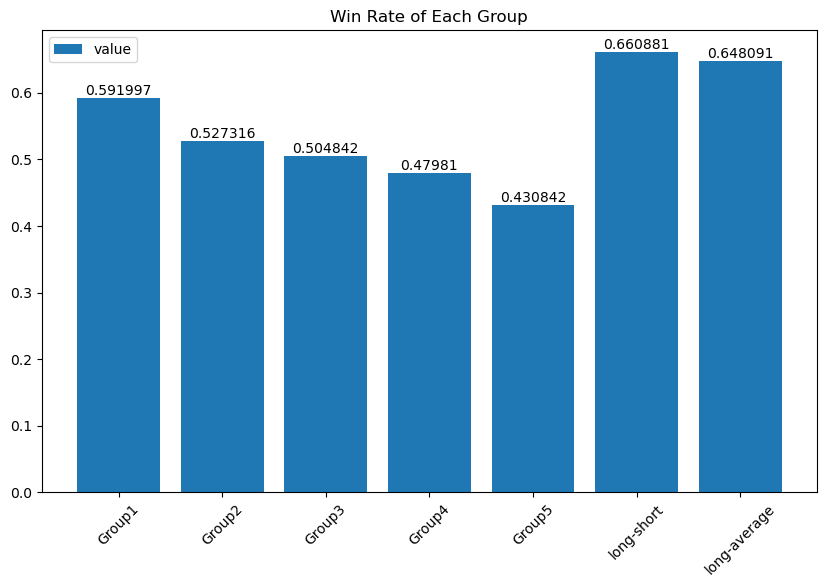

In [7]:
pred = executor.prepare(pred, df_test, price="close", volume="volume", real_ret=y_test)
report.group_return_ana(pred, pred["R"])